# Pipeline #2 - Imaging

<img src="img/pipeline2.png"/>

This second phase of the project involves preparing structural MRI data for analysis. Since clusters will have been identified, we aim to compare them based on neural decline, measured through cortical thickness and volume. Therefore, the MRI data must be prepared and preprocessed to extract the data of interest.

## Pipeline overview

Pipeline #2 prepares the raw neuroimaging data for analyses. Specifically, the following is done:

- BIDS conversion of raw MRIs
- Freesurfer preprocessing
- Manipulating neuroimaging data

Throughout the school, this process was tested on a small subset (n = 3).

In [3]:
# Loading libraries

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import nibabel as nb
from nilearn import plotting

## BIDS conversion

The BIDS conversion step has not yet been automated and was manually tested on a small subset (n = 3). For this part, the current documentation will detail the steps taken so far and include links to relevant resources. 

The MRI data is in DICOM format. The dcm files need to be converted to BIDS format for preprocessing. The tool used for this conversion is [dcm2bids](https://unfmontreal.github.io/Dcm2Bids/3.1.1/). 

### Config file
Following the installation of dcm2bids, the dcm2bids_config.json files used for conversion were prepared for 3 subjects whose MRI images were to be converted as a mock test. An example of config file can be found [here](https://github.com/song-y/SubtypingPD/blob/main/brainhack_source/resources/dcm2bids_config.json). 

### BIDS format
Following the conversion, the files were formatted as follows:




<img src="img/bids_tree.png"/>


## Freesurfer preprocessing

[Freesurfer](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3685476/) is an open-source tool for performing a wide range of procedures on neuroimaging data. As part of the current project, Freesurfer was used for its automated process of cortical reconstruction.

### Parallelizing the process on Compute Canada
A bash script was written to automate the task ([workflow](https://surfer.nmr.mgh.harvard.edu/fswiki/LongitudinalProcessing)). The script was lauched on a loop for parallelization on the Compute Canada Cedar cluster. See [resources/freesurferPreproc/](https://github.com/song-y/SubtypingPD/tree/main/brainhack_source/resources/freesurferPreproc) for scripts.

### Cortical volume
Cortical volume values were successfully extracted from obtained 'output_folder/sub-id/stats/aseg.stats' files:

<img src="img/aseg.stats.png"/>

## Manipulating neuroimaging data

While our objective was to extract values of cortical thickness and volume values from the scans, validating the content of brain images is also crucial. Following the [BH tutorial on neuroimaging data](https://school-brainhack.github.io/modules/nibabel/), anatomical nifti image of  participant *sub-004* was used to gain hands-on experience with neuroimaging packages such as Nibabel and Nilearn. 

Let's load an image and take a look at its metadata.

In [4]:
t1w = nb.load('/Users/song/Documents/dev/repos/10. brainhack 2024/bhSubtypingPD/brainhack_source/resources/freesurferPreproc/output/bids/sub-004/ses-01/anat/sub-004_ses-01_T1w.nii.gz')
print(t1w)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (172, 256, 256)
affine:
[[   1.            0.            0.          -79.68720245]
 [   0.            1.            0.         -100.45700073]
 [   0.            0.            1.         -108.28700256]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 172 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       1.       1.       1.       0.007176 0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.

We can see it's a 3D image, with shape (172, 256, 256).
Let's try accessing the data array using voxel coordinates (array indices).

(172, 256, 256)


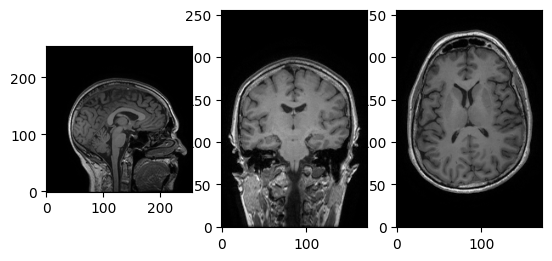

In [5]:
data = t1w.get_fdata()
affine = t1w.affine
header = t1w.header

print(data.shape)
i, j, k = np.array(data.shape) // 2
fig, axes = plt.subplots(1, 3)
axes[0].imshow(data[i,:,:].T, cmap='Greys_r', origin='lower')
axes[1].imshow(data[:,j,:].T, cmap='Greys_r', origin='lower')
_ = axes[2].imshow(data[:,:,k].T, cmap='Greys_r', origin='lower')

Using Nibabel's viewer, img.orthoview().

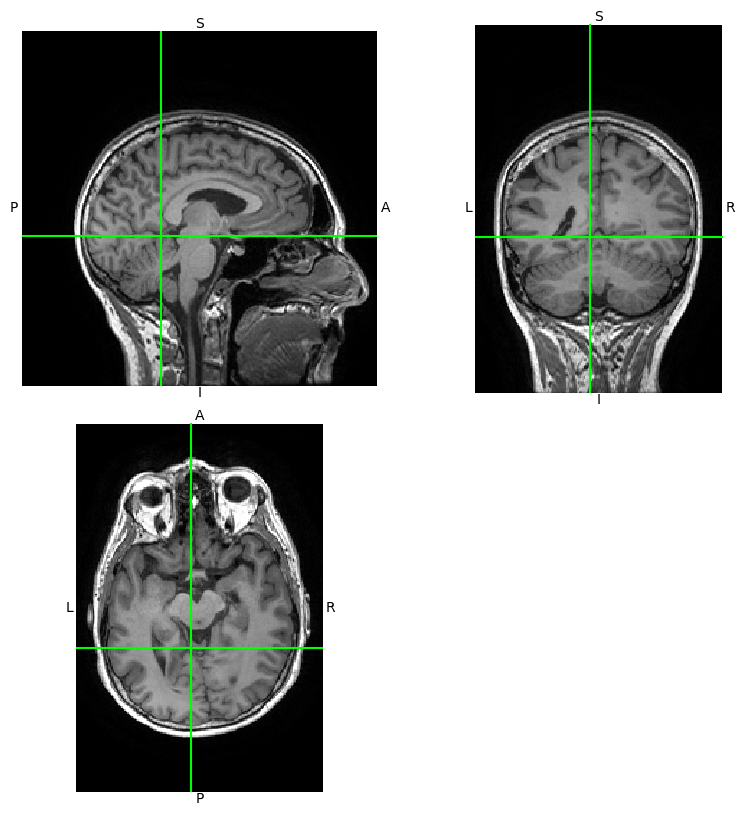

In [6]:
_ = t1w.orthoview() 

Getting a dynamic view of the same image using Nilearn.
Let's try moving the cursor!

/Users/song/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/song/Library/Python/3.9/lib/python/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int32 to float32
  return resample_img(



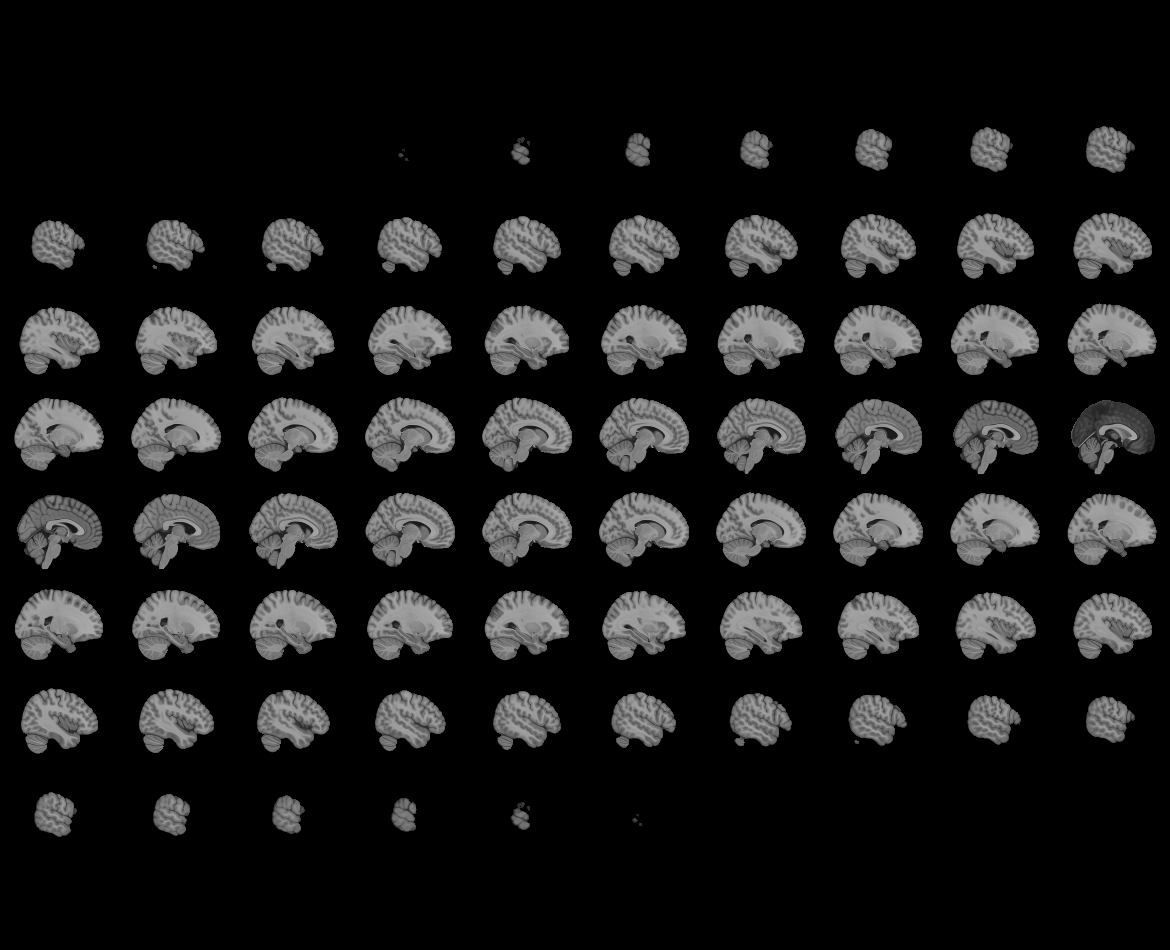
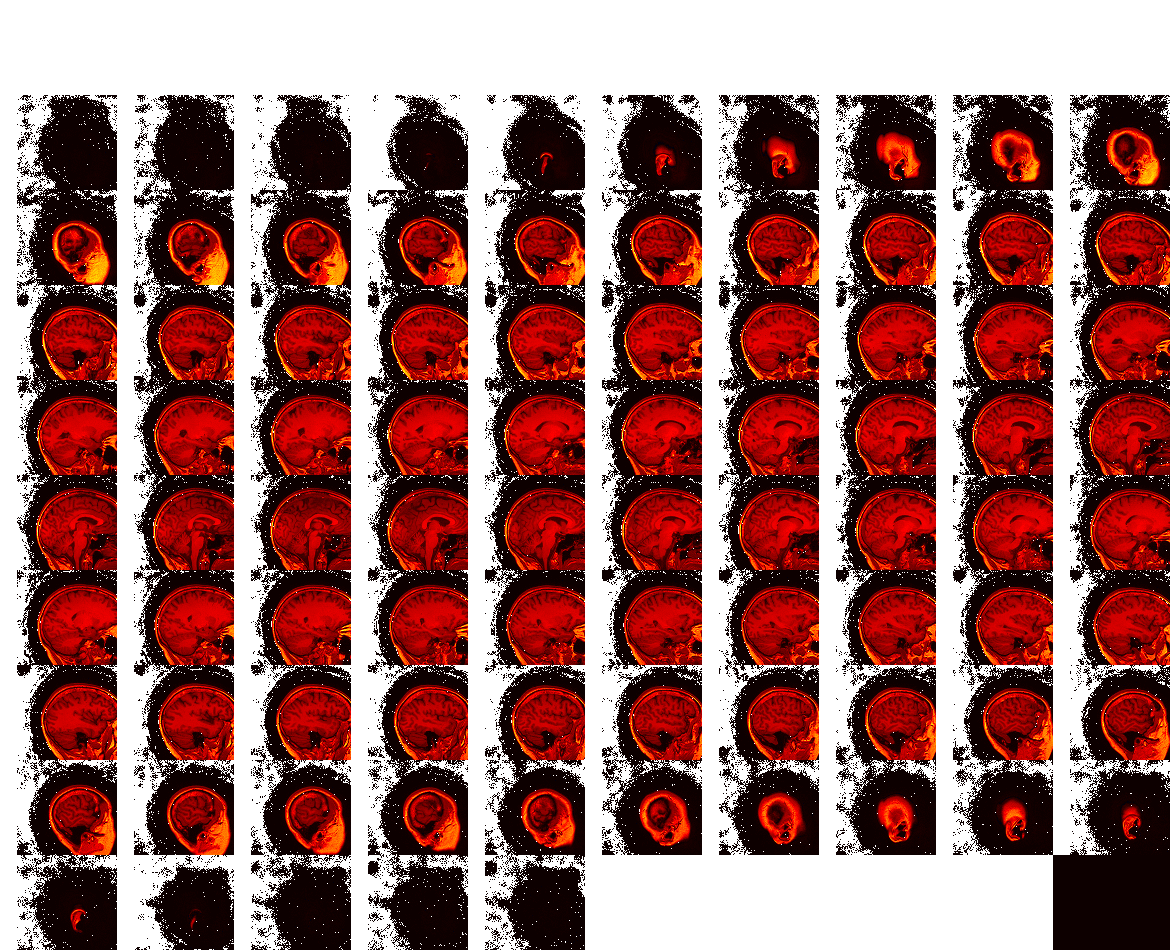

In [10]:
view = plotting.view_img(t1w, threshold=3)
view

Plotting a statistical map overlapping the image. 

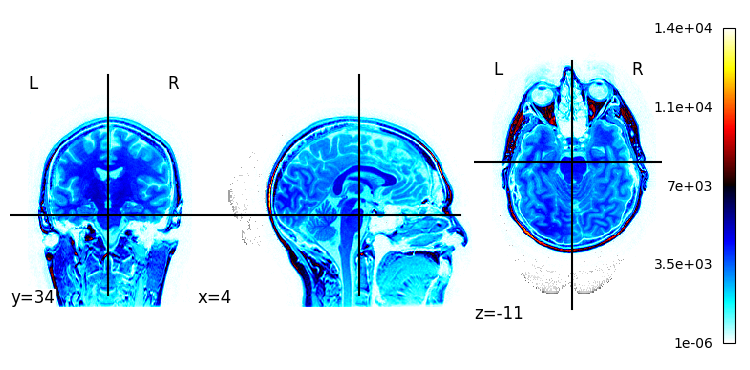

In [8]:
plotting.plot_stat_map(t1w)

## What is next?

This pipeline allowed me to get a bit more familiar with manipulating neuroimaging data and explore various tools for preparation and preprocessing of structural MRI data. Now that a basic flow has been implemented, I'd like to scale this pipeline to process my entire dataset of longitudinal MRI scans. Additionally, I'd like to automate the BIDS conversion process, although this seems to pose some challenges (I haven't figured out how to automate the creation of config files, etc.). 